In [1]:
#Polynomial Regression 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
features = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
features.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


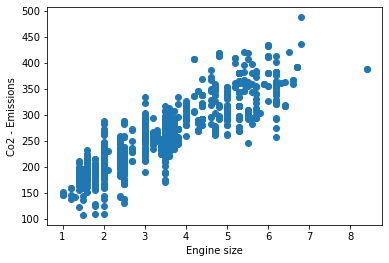

In [5]:
plt.scatter(features.ENGINESIZE,features.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Co2 - Emissions")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
Y = data[['CO2EMISSIONS']]

train_X,test_X,train_y,test_y = train_test_split(X,Y,test_size = 0.2,random_state = 73)

In [10]:
print(train_X.shape,train_y.shape)
print(test_X.shape,test_y.shape)

(853, 5) (853, 1)
(214, 5) (214, 1)


In [11]:
train_X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
568,5.0,8,13.5,15.6,10.9
52,4.2,8,13.3,15.3,10.9
912,5.7,8,14.1,16.3,11.5
875,3.4,6,10.1,11.6,8.3
412,2.5,4,8.9,10.5,7.0


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = train_X[['ENGINESIZE']]
train_Y = train_y[['CO2EMISSIONS']]

test_x = test_X[['ENGINESIZE']]
test_Y = test_y[['CO2EMISSIONS']]

poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  5.  , 25.  ],
       [ 1.  ,  4.2 , 17.64],
       [ 1.  ,  5.7 , 32.49],
       ...,
       [ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  3.6 , 12.96],
       [ 1.  ,  3.6 , 12.96]])

#### *fit_transform* 
takes x values and output a list of our data raised from power to 0 to power of 2
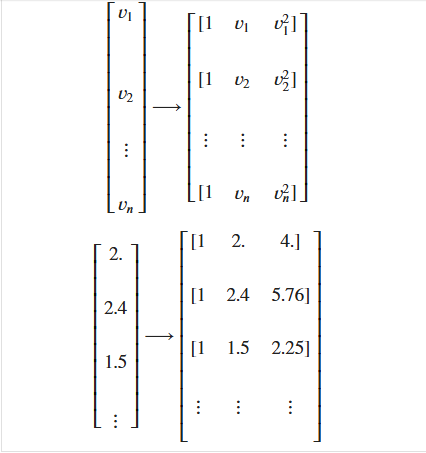



In [17]:
model = linear_model.LinearRegression()
model = model.fit(train_x_poly,train_y)

print("Co-efficents",model.coef_)
print("Intercept",model.intercept_)

Co-efficents [[ 0.         50.85843695 -1.56143677]]
Intercept [107.28196066]


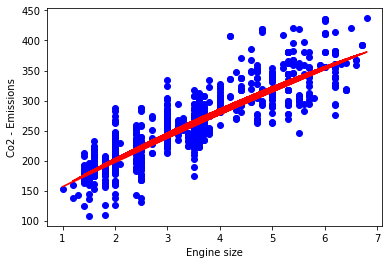

In [21]:
#y = w0 + w1x + w2x**2
plt.scatter(train_x,train_Y,color ='b')
y_ = model.intercept_[0] + model.coef_[0][1]*train_x + model.coef_[0][2]*np.power(train_x,2)
plt.plot(train_x,y_,color = 'r')
plt.xlabel("Engine size")
plt.ylabel("Co2 - Emissions")
plt.show()

In [24]:
# Poly Model Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
test_x_poly = poly.transform(test_x)
predict = model.predict(test_x_poly)
print("Mean Absolute Error",mean_absolute_error(test_y,predict))
print("Mean Squared Error",mean_squared_error(test_y,predict))
print("R2-score",r2_score(test_y,predict))

Mean Absolute Error 24.63806608824268
Mean Squared Error 1082.8100931245917
R2-score 0.7520749641107657


In [35]:
#Polynomial Equation with degree-3
poly3 = PolynomialFeatures(degree = 3)
train_3x = poly3.fit_transform(train_x)

print(train_3x[0:5])
#print(train_3x.shape,train_y.shape)

model3 = linear_model.LinearRegression()
model3 = model3.fit(train_3x,train_y)

print("Co-efficents",model3.coef_)
print("Intercept",model3.intercept_)
print()

# Poly Model Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
test_3x = poly3.transform(test_x)
predict3x = model3.predict(test_3x)



print("Mean Absolute Error",mean_absolute_error(test_y,predict3x))
print("Mean Squared Error",mean_squared_error(test_y,predict3x))
print("R2-score",r2_score(test_y,predict3x))

[[  1.      5.     25.    125.   ]
 [  1.      4.2    17.64   74.088]
 [  1.      5.7    32.49  185.193]
 [  1.      3.4    11.56   39.304]
 [  1.      2.5     6.25   15.625]]
Co-efficents [[ 0.         30.42188849  4.34431192 -0.51640098]]
Intercept [128.2236367]

Mean Absolute Error 24.4816250250123
Mean Squared Error 1074.2308915063231
R2-score 0.7540392964370118


[[ 0.         30.42188849  4.34431192 -0.51640098]]
[128.2236367]


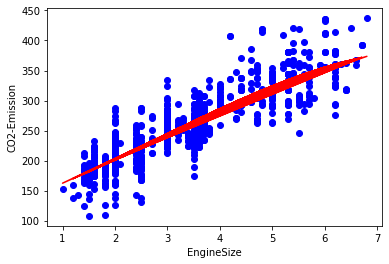

In [37]:
print(model3.coef_)
print(model3.intercept_)
#plotting the Poly-Degree3 #y = w0 + w1x + w2x**2 + w3x**3
plt.scatter(train_x,train_y,color = 'b')
result = model3.intercept_ + model3.coef_[0][1]*train_x + model3.coef_[0][2]*np.power(train_x,2) + model3.coef_[0][3]*np.power(train_x,3)
plt.plot(train_x,result,color = 'r')
plt.xlabel("EngineSize")
plt.ylabel("CO2-Emission")
plt.show()